In [ ]:
import tensorflow as tf
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.optimizers import RMSprop

from google.colab import drive
drive.mount('/content/gdrive')

# Define your data directory and class names
data_dir = '/content/gdrive/MyDrive/new (1)/Kazakhstan_Banknotes_Dataset (1)/out_dir/'
classes = ["500_tenge", "1000_tenge", "2000_tenge", "5000_tenge", "10000_tenge", "20000_tenge"]

# Define image dimensions and batch size
img_height, img_width = 224, 224
batch_size = 32

# Load the data using tf.keras.utils.image_dataset_from_directory
train_ds = tf.keras.utils.image_dataset_from_directory(
    data_dir,
    labels="inferred",
    label_mode="int",  # Use 'int' label_mode for multi-class classification
    validation_split=0.2,
    subset="training",
    seed=123,
    image_size=(img_height, img_width),
    batch_size=batch_size,
    class_names=classes
)

val_ds = tf.keras.utils.image_dataset_from_directory(
    data_dir,
    labels="inferred",
    label_mode="int",
    validation_split=0.2,
    subset="validation",
    seed=123,
    image_size=(img_height, img_width),
    batch_size=batch_size,
    class_names=classes
)

# Create and compile your model
resnet_model = Sequential()

pretrained_model = tf.keras.applications.ResNet50(include_top=False,
                   input_shape=(img_height, img_width, 3),
                   pooling='avg',
                   weights='imagenet')

for layer in pretrained_model.layers:
    layer.trainable = False

resnet_model.add(pretrained_model)
resnet_model.add(Flatten())
resnet_model.add(Dense(256, activation='relu'))
resnet_model.add(Dense(len(classes), activation='softmax'))  # Use len(classes) for the number of output classes

# Compile the model
resnet_model.compile(
    optimizer=Adam(learning_rate=0.001),  # Update optimizer setup if needed
    loss='sparse_categorical_crossentropy',  # Use 'sparse_categorical_crossentropy' for integer labels
    metrics=['accuracy']
)

# Train the model
epochs = 10
history = resnet_model.fit(
    train_ds,
    validation_data=val_ds,
    epochs=epochs
)


Mounted at /content/gdrive
Found 1259 files belonging to 6 classes.
Using 1008 files for training.
Found 1259 files belonging to 6 classes.
Using 251 files for validation.
94765736/94765736 [==============================] - 1s 0us/step
Epoch 1/10
32/32 [==============================] - 211s 5s/step - loss: 1.0500 - accuracy: 0.6716 - val_loss: 0.3230 - val_accuracy: 0.9044
Epoch 2/10
32/32 [==============================] - 9s 246ms/step - loss: 0.1221 - accuracy: 0.9762 - val_loss: 0.1426 - val_accuracy: 0.9522
Epoch 3/10
32/32 [==============================] - 7s 193ms/step - loss: 0.0473 - accuracy: 0.9950 - val_loss: 0.1018 - val_accuracy: 0.9801
Epoch 4/10
32/32 [==============================] - 10s 268ms/step - loss: 0.0329 - accuracy: 0.9960 - val_loss: 0.0846 - val_accuracy: 0.9801
Epoch 5/10
32/32 [==============================] - 7s 198ms/step - loss: 0.0155 - accuracy: 1.0000 - val_loss: 0.0835 - val_accuracy: 0.9761
Epoch 6/10
32/32 [==============================] - 9

8/8 [==============================] - 2s 102ms/step - loss: 0.0605 - accuracy: 0.9801
Train Loss: 0.0033 | Train Accuracy: 1.00%
Validation Loss: 0.0605 | Validation Accuracy: 0.98%
1/1 [==============================] - 1s 1s/step


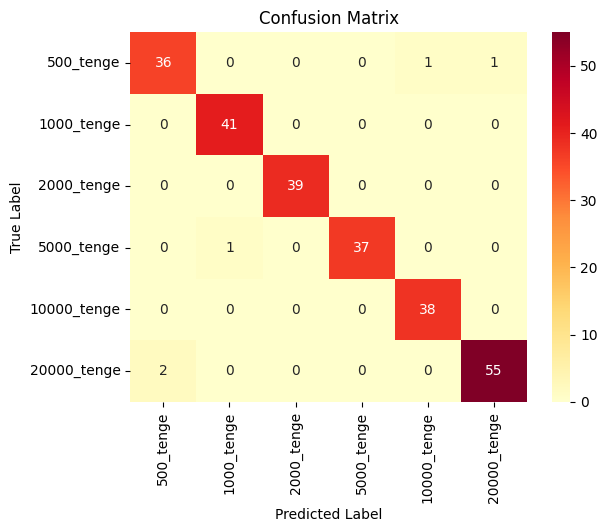

F1 Score: 0.9804
Precision: 0.9800
Recall: 0.9810


In [ ]:
import tensorflow as tf
from tensorflow.keras.utils import plot_model
from sklearn.metrics import confusion_matrix, f1_score, precision_score, recall_score
import numpy as np

# Define the function to plot the confusion matrix
def plot_confusion_matrix(cm, classes):
    """
    Plot the confusion matrix as a heatmap.

    Args:
        cm (numpy.ndarray): The confusion matrix.
        classes (list): The list of class labels.
    """
    import matplotlib.pyplot as plt
    import seaborn as sns

    sns.heatmap(cm, annot=True, fmt="d", xticklabels=classes, yticklabels=classes,
                cmap="YlOrRd", cbar=True)
    plt.title("Confusion Matrix")
    plt.xlabel("Predicted Label")
    plt.ylabel("True Label")
    plt.show()

# Evaluate the model on the training and validation datasets
train_loss, train_accuracy = resnet_model.evaluate(train_ds)
val_loss, val_accuracy = resnet_model.evaluate(val_ds)

print(f'Train Loss: {train_loss:.4f} | Train Accuracy: {train_accuracy:.2f}%')
print(f'Validation Loss: {val_loss:.4f} | Validation Accuracy: {val_accuracy:.2f}%')

# Calculate the confusion matrix for the validation dataset
y_true = []
y_pred = []

for inputs, labels in val_ds:
    predictions = resnet_model.predict(inputs)
    y_true.append(labels.numpy())
    y_pred.append(np.argmax(predictions, axis=1))

y_true = np.concatenate(y_true)
y_pred = np.concatenate(y_pred)

conf_matrix = confusion_matrix(y_true, y_pred)

# Display the confusion matrix
plot_confusion_matrix(conf_matrix, classes)

# Calculate F1 score, precision, and recall for the validation dataset
f1 = f1_score(y_true, y_pred, average='macro')
precision = precision_score(y_true, y_pred, average='macro')
recall = recall_score(y_true, y_pred, average='macro')

print(f'F1 Score: {f1:.4f}')
print(f'Precision: {precision:.4f}')
print(f'Recall: {recall:.4f}')


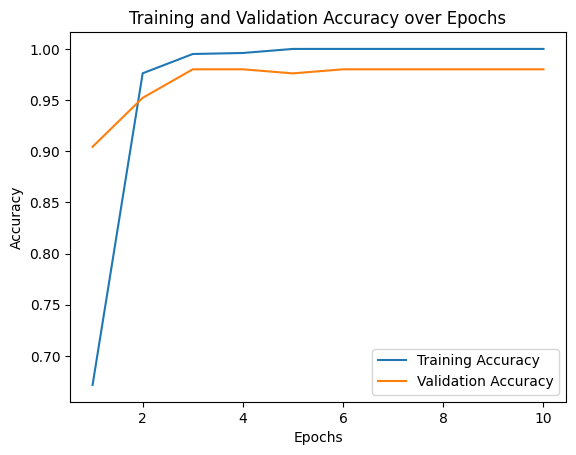

In [ ]:
import matplotlib.pyplot as plt
# Plot the training accuracy
# Extract accuracy values from history
train_acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

# Plot the accuracy values over epochs
epochs = range(1, len(train_acc) + 1)

plt.plot(epochs, train_acc, label='Training Accuracy')
plt.plot(epochs, val_acc, label='Validation Accuracy')

plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracy over Epochs')
plt.legend()

plt.show()

In [ ]:
model_save_path = '/content/gdrive/MyDrive/new (1)/Kazakhstan_Banknotes_Dataset (1)/'

# Save the model to the specified path
resnet_model.save(model_save_path)

PermissionDeniedError: ignored

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, f1_score, precision_score, recall_score

# Assuming you have a validation dataset 'val_ds' with true labels and 'val_preds' with predicted labels
# 'val_preds' should be the output of your model for the validation dataset

true_labels = []
predicted_labels = []

for images, labels in val_ds:
    true_labels.extend(labels.numpy())
    predicted_labels.extend(resnet_model.predict(images).argmax(axis=1))

# Calculate and print the evaluation metrics
accuracy = accuracy_score(true_labels, predicted_labels)
precision = precision_score(true_labels, predicted_labels, average='macro')
recall = recall_score(true_labels, predicted_labels, average='macro')
f1 = f1_score(true_labels, predicted_labels, average='macro')

# Print the classification report and confusion matrix
report = classification_report(true_labels, predicted_labels, target_names=classes)
confusion = confusion_matrix(true_labels, predicted_labels)

print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1 Score: {f1}")
print("\nClassification Report:\n", report)
print("\nConfusion Matrix:\n", confusion)
